# Predicting customer churn using Logistic Regression

Dataset Link: https://www.kaggle.com/datasets/santoshd3/bank-customers

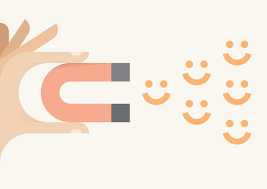

## Project goal:

Many companies provide </font color ='green'>**subscription-based services**</font>, such as online video streaming, music streaming, or software-as-a-service (SaaS) products. These companies rely on recurring revenue from their subscribers to sustain their business. However, some subscribers may decide to cancel their subscription, which is called **"churn"**.

The goal of this project is to build a <font color='blue'>**logistic regression**</font> model that can predict customer churn in a banking company using the Bank Customer Churn dataset from [Kaggle](https://www.kaggle.com/datasets/santoshd3/bank-customers). The model can be used by the bank to identify customers who are at risk of leaving and take appropriate actions to retain them. This can help the bank reduce customer churn, increase customer loyalty.

### Definition

Logistic regression is an example of supervised machine learning that is primarily used for  for binary classification, the target variable must be categorical, such as <font color = 'res'>"yes" or "no", "0" or "1", "churn" or "no churn"</font>. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.

The formula for logistic regression involves calculating the probability of an event occurring given certain input variables. In mathematical notation, it looks like this:

P(event:churn) = 1 / (1 + e^-(b0 + b1x1 + b2x2 + ... + bnxn))

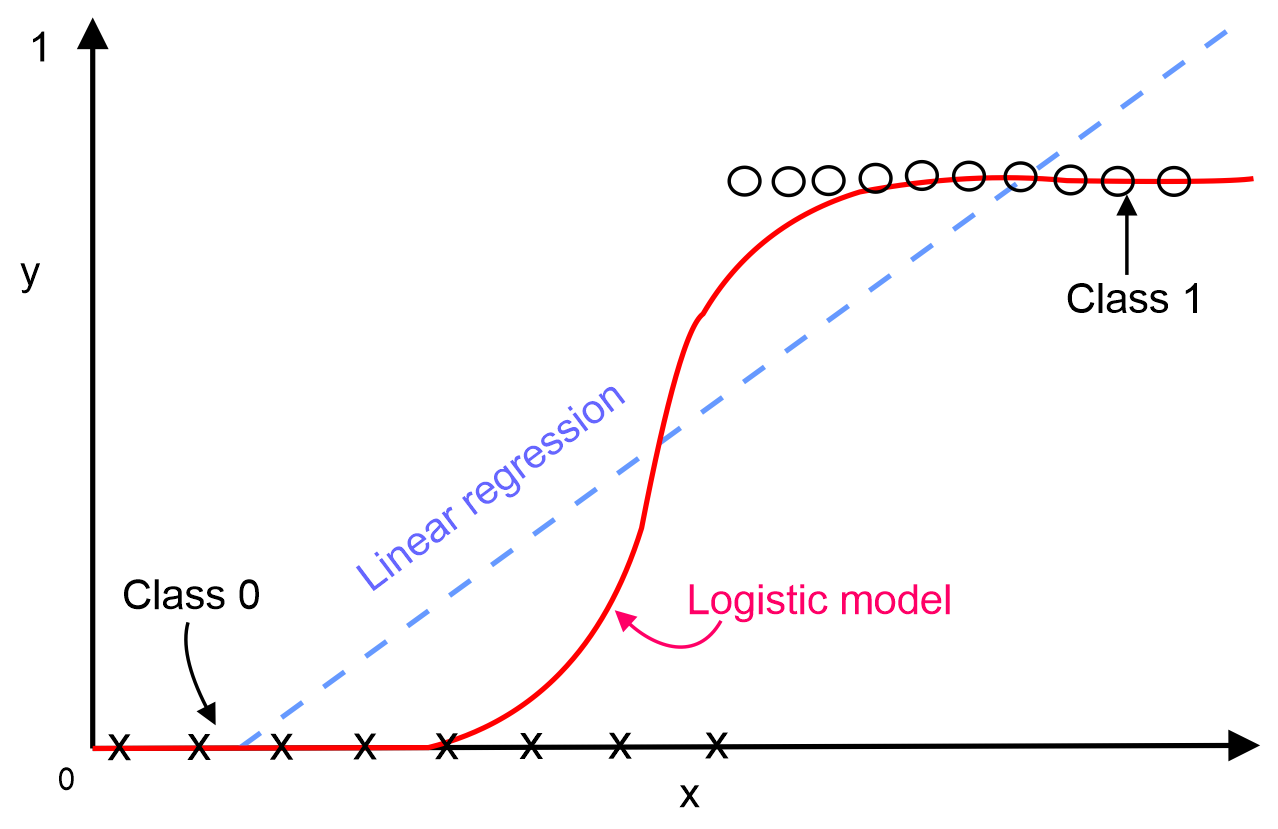

### Key Assumptions

**No multicollinearity**: The independent variables (features) should not be <font color ='red'>highly correlated</font> with each other. High correlation between the independent variables can lead to unstable estimates of the regression coefficients.

**Binary or ordinal dependent variable**: Logistic regression is designed for binary or ordinal dependent variables, where the target variable has only two or a small number of ordered categories.

### Types of Logistic Regression

1. **Binomial**: In binomial Logistic regression, there can be <font color ='red'>only two</fofnt> possible types of target variables, such as **0** or **1**, **Spam** or **Ham**, etc.

2. **Multinomial**: In multinomial Logistic regression, there can be <font color ='red'>3 or more</font> possible unordered types of target variable, such as **"cat"**, **"dogs"**, or **"bird"**.

3. **Ordinal**: In ordinal Logistic regression, there can be <font color ='red'>3 or more</font> possible ordered types of target variables, such as **"low"**, **"Medium"**, or **"High"**.

#### In this Project we will creata a <font color ='brown'>Binomial</font> Logistic Regression Model (The traget variable <font color = 'red'>Churn</font> or <font color = 'green'>No churn</font>). 








In [ ]:
# Importing the required librairies 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from scipy.stats.mstats import winsorize
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import plotly.express as px



## Loading the Dataset

In [ ]:
data = pd.read_csv('churn_data.csv')

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Exploratory Data Analysis (EDA)

EDA is a crucial part in Data science, this is the step where we are going to analyse and do some investigation 🔬.

The mission now is to discover the pattern that exist in our dataset, so that we can select the best features that are going to be feed to the model to protect our bank from losing theire customers. 

### Descriptive statistics 

In [ ]:
# How many columns and rows? 
print('The dataset contains', data.shape[0],'and ', data.shape[1], 'columns')

The dataset contains 10000 and  14 columns


In [ ]:
#Summary statistics for each numerical column in the dataset
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


1. **Count**: This tells us the count of non-null values in each column. 

2. **Mean**: The average value of each column. In this example, the average Age is 38 years and the average Balance is 76485 USD.

3. **Std**: This tells us the standard deviation of each column. In this example, the standard deviation of Age is 10.082 years and the standard deviation of Salary is 62397 USD. <font color ='blue'>The standard deviation indicates the amount of variability or spread of the data around the mean</font>.

4. **Min and Max**: This is the minimum and maximum values of each column. In this example, the minimum Age is 18 years and the maximum Age is 92 years.

5. **25%, 50%, and 75% (quartiles)**: The rows shows the values at which 25%, 50%, and 75% of the data fall below that value. In this example, the 25th percentile of Age is 32 years, the median (50th percentile) of Age is 37 years, and the 75th percentile of Age is 44 years. Similarly, the 25th percentile of Salary is 45 thousand dollars, the median of Salary is 62 thousand dollars, and the 75th percentile of Salary is 78 thousand dollars.

### Checking the data type and null values

We are lucky! we don't have any missing values on the dataset and the data types seems correct.

In [ ]:
#Checking the data types of each column
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
#Checking for null values
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Frequency tables

**How many customer say Goodbye to our bank**

The output below tells us that there are two unique values in the <font color='blue'>**Exited column**</font>: **0** and **1**. There are <font color='green'>**7,963**</font> customers who have not churned (represented by 0), and <font color ='red'>**2,037**</font> customers who have churned (represented by 1). We can use this information to gain a better understanding of the proportion of customers who have churned in our dataset. 

**(2,037 / 10,000) * 100 = 20.37%**

In this case, we can see that approximately **20%** of customers have churned.



In [ ]:
# Generate frequency distribution for Exited column
churned = data['Exited'].value_counts()
churned

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
# Create an interactive bar chart
fig = px.bar(churned, x=churned.index, y=churned.values, labels={'x':'Churn', 'y':'Count'})

# Show the bar chart
fig.show()

In [ ]:
print(data['Geography'].value_counts())

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


In [ ]:
print(data['Gender'].value_counts())

Male      5457
Female    4543
Name: Gender, dtype: int64


In [ ]:
print(data['HasCrCard'].value_counts())

1    7055
0    2945
Name: HasCrCard, dtype: int64


In [ ]:
# Create a frequency table for the 'Geography' column
freq_table = data['Geography'].value_counts()

# Create an interactive bar chart
fig = px.bar(freq_table, x=freq_table.index, y=freq_table.values, labels={'x':'Geography', 'y':'Count'})

# Show the bar chart
fig.show()

<ipython-input-133-206c6abf44fc>:27: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



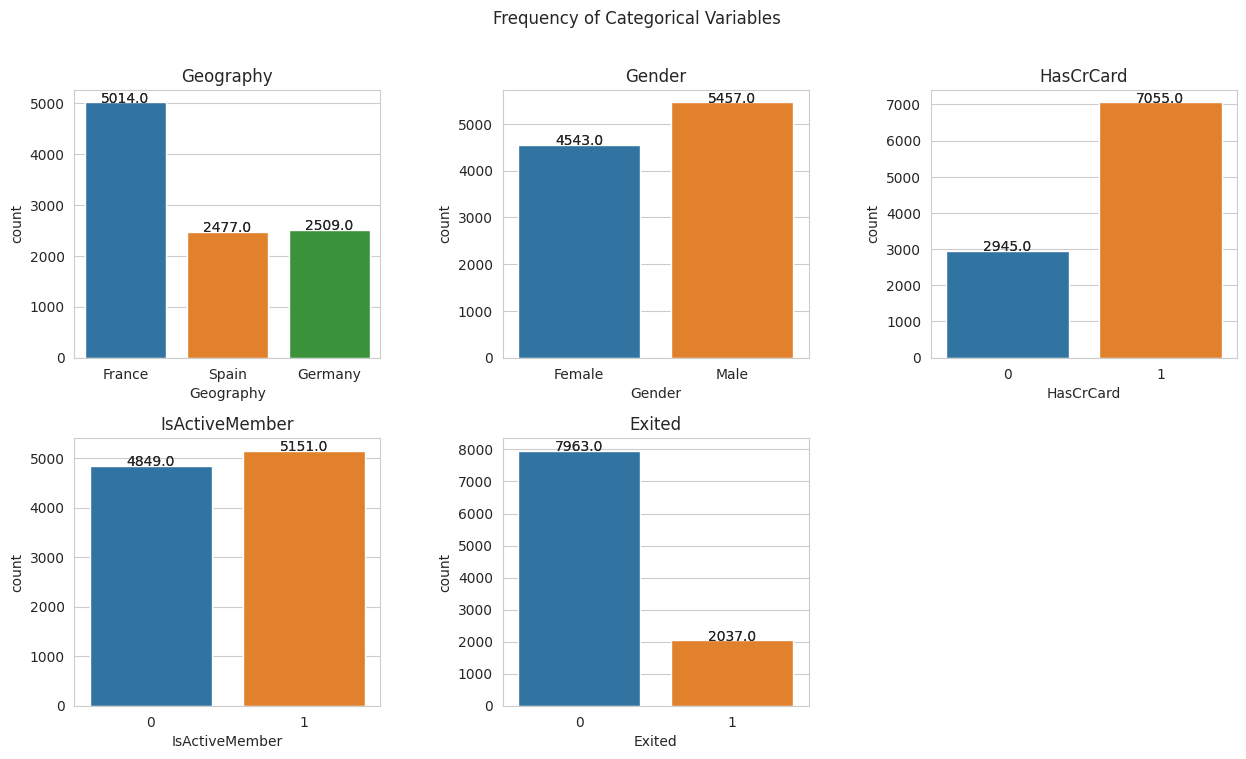

In [ ]:
# Set the figure size
plt.figure(figsize=(15, 8))

# Create the subplot grid
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

# Define the columns for each subplot
columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']

# Iterate over the columns and create the subplots
for i, col in enumerate(columns):
    plt.subplot(grid[i // 3, i % 3])
    sns.countplot(x=col, data=data)
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('Count')
    
    # Add annotations to each bar
    for p in sns.countplot(x=col, data=data).patches:
        height = p.get_height()
        plt.text(p.get_x() + p.get_width()/2., height+0.2, height, ha="center")

# Add a main title to the figure
plt.suptitle('Frequency of Categorical Variables')

# Add a legend
plt.tight_layout()
plt.show()


### Understanding the data distribution 

In [ ]:
#Checking columns names
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
# Removing the column RowNumber and CustomerId
data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

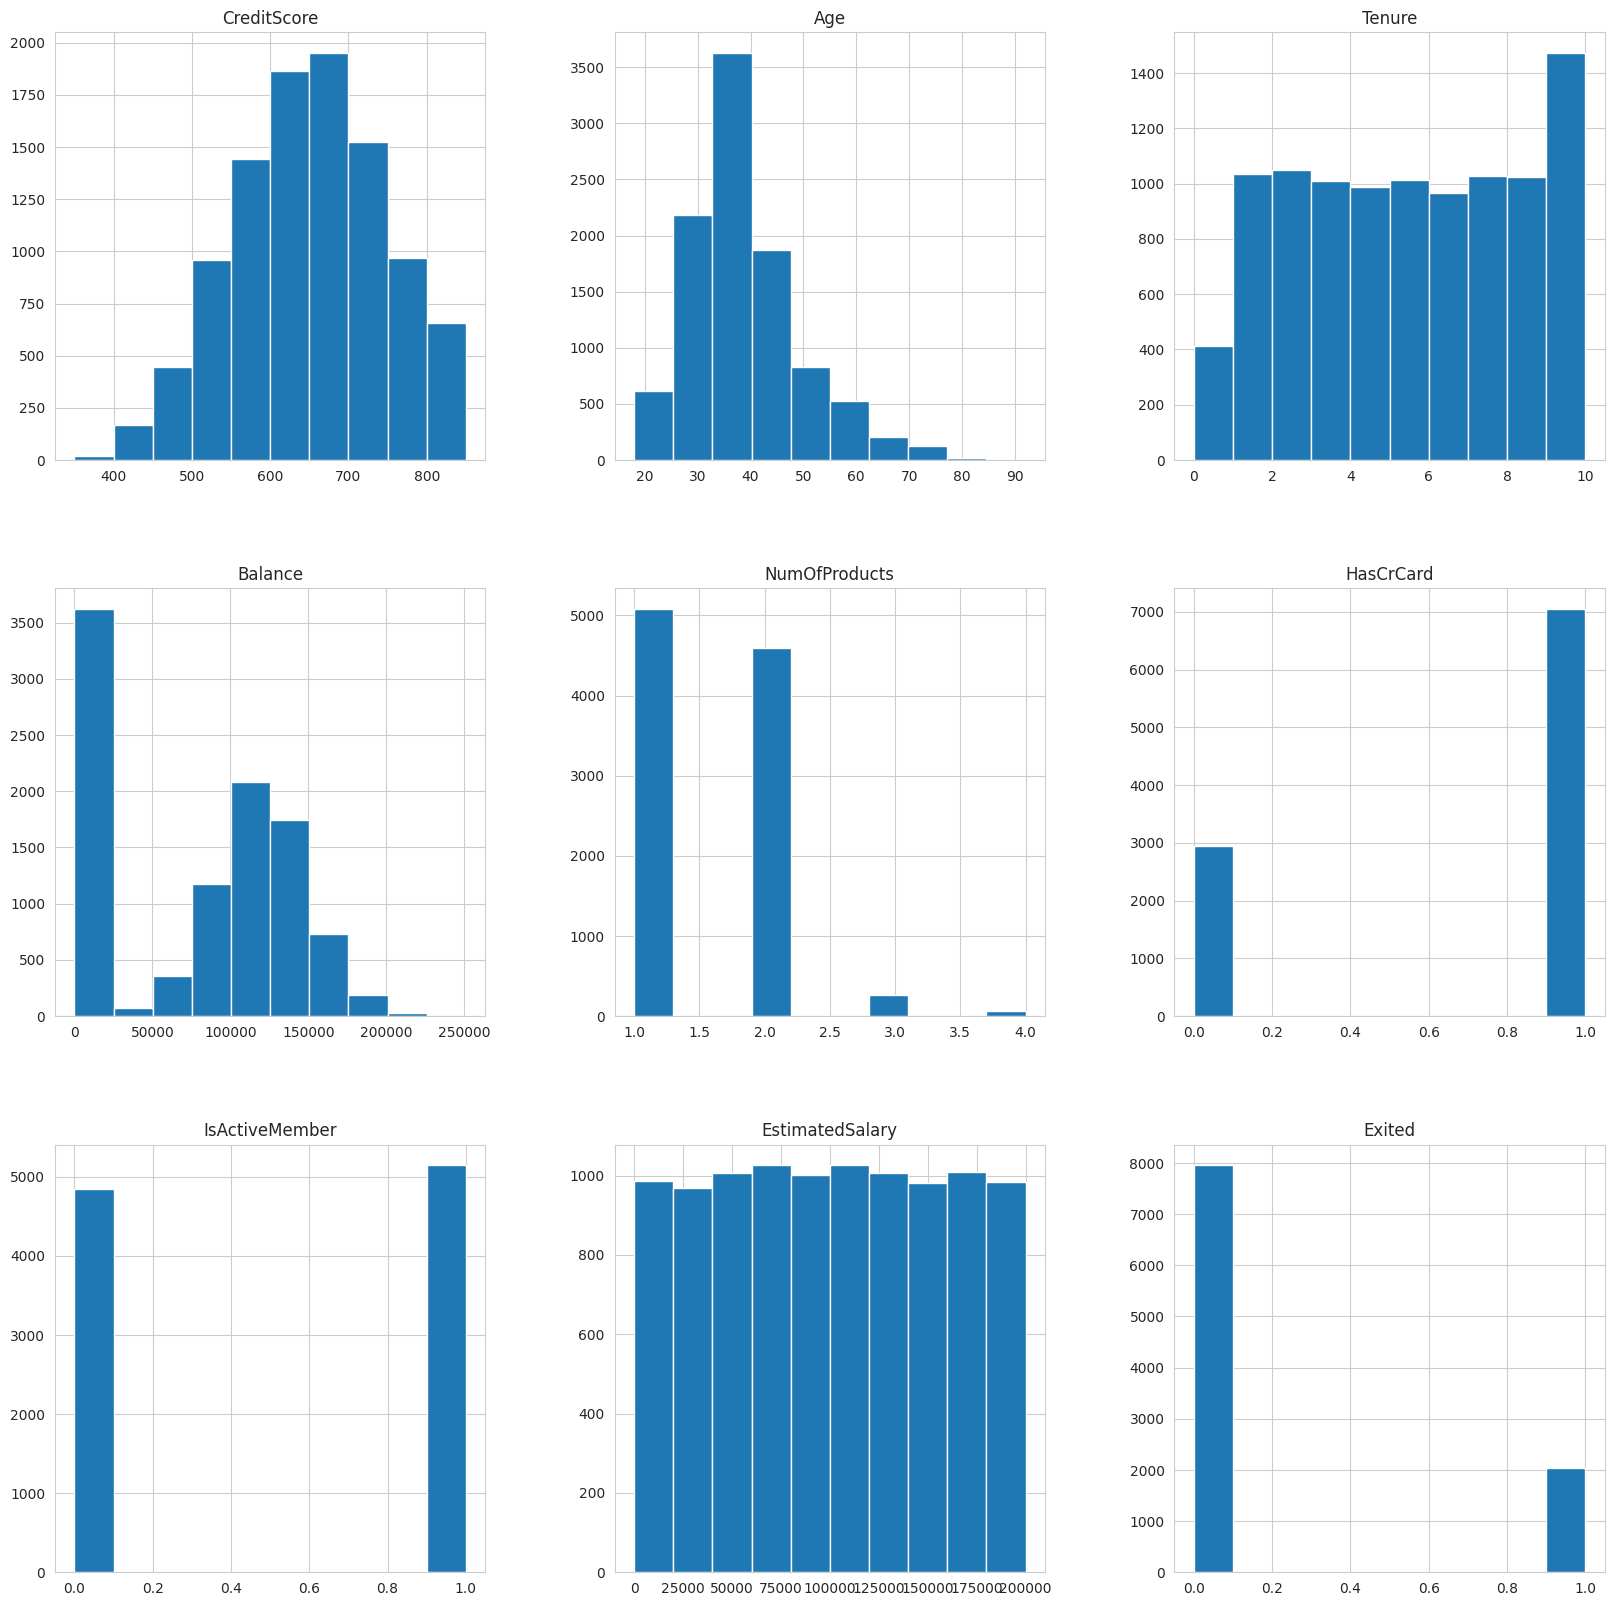

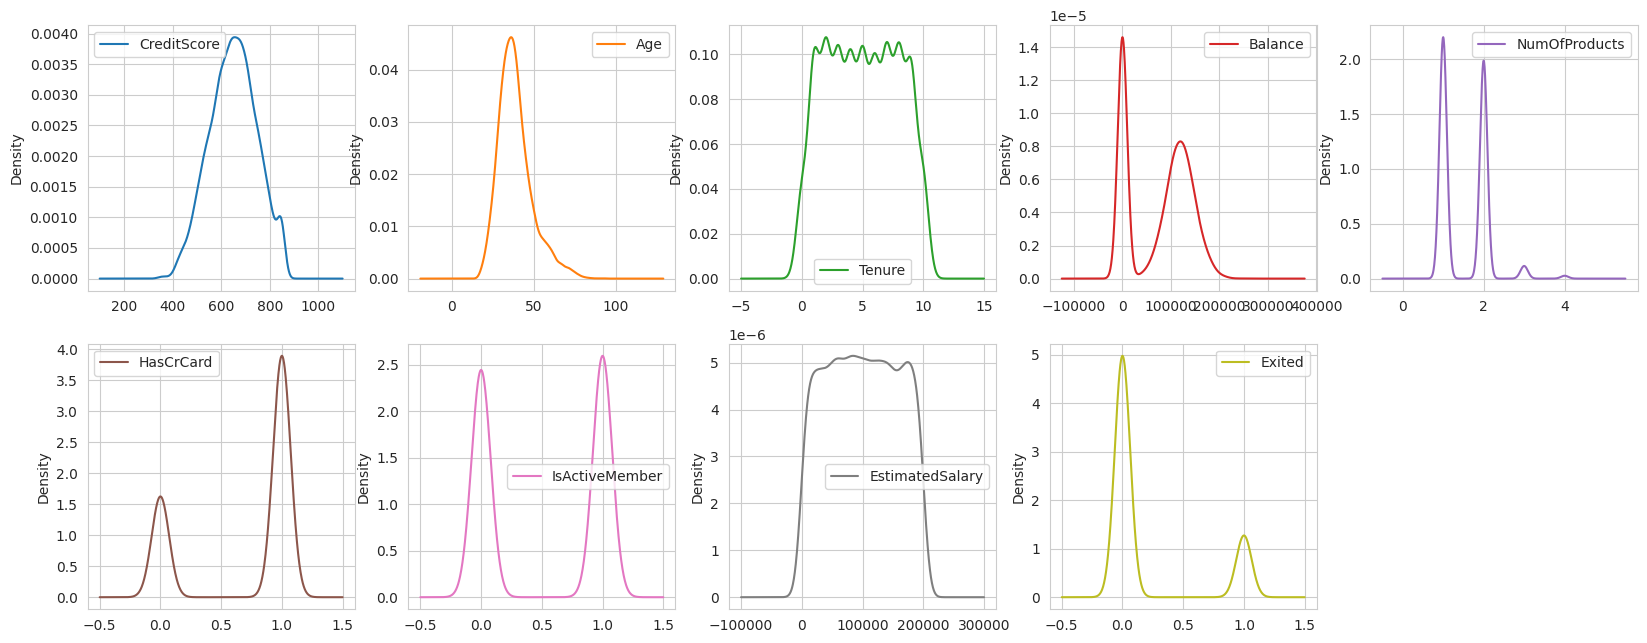

In [ ]:
# Create histograms for numeric variables
data.hist(figsize=(20, 20))
plt.show()

# Create density plots for numeric variables
data.plot(kind='density', subplots=True, layout=(5, 5), sharex=False, figsize=(20, 20))
plt.show()




### Checking for outliers

In [ ]:
data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

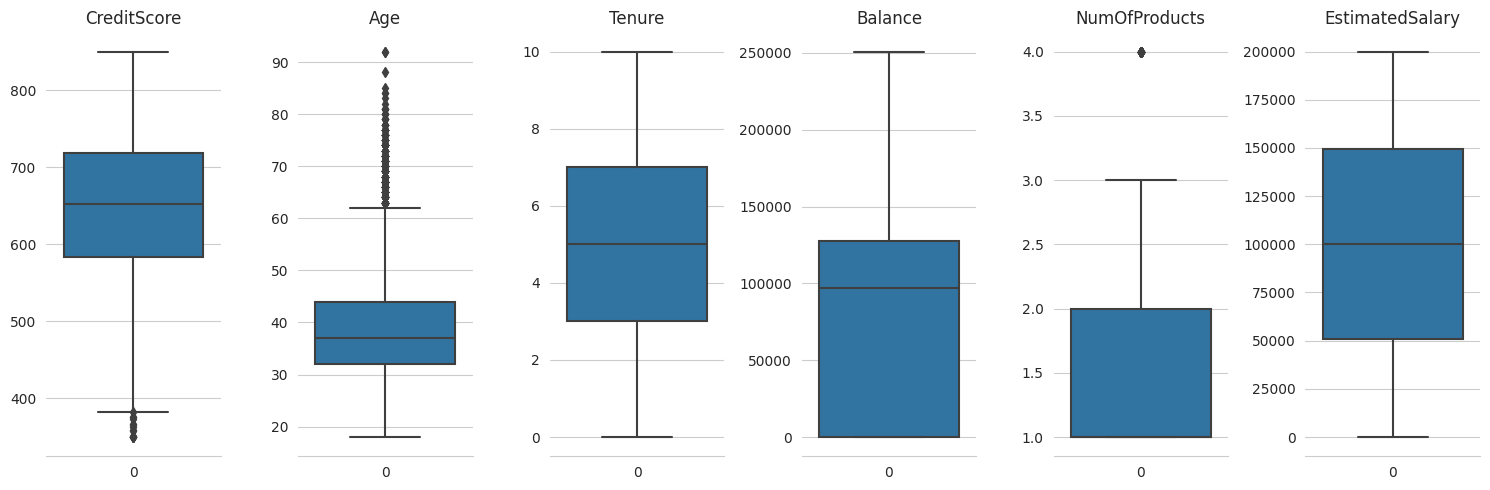

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select specific columns to create boxplots for
cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Create a grid of boxplots
fig, axs = plt.subplots(nrows=1, ncols=len(cols), figsize=(15,5))
for i, col in enumerate(cols):
    sns.boxplot(data=data[col], ax=axs[i])
    axs[i].set_title(col)
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')
    
# Add some styling to the plot
plt.tight_layout()
sns.set_style("whitegrid")
sns.despine(left=True)
plt.show()


In [ ]:
Q1 = data['NumOfProducts'].quantile(0.25)
Q3 = data['NumOfProducts'].quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data['NumOfProducts'] < Q1 - 1.5*IQR) | (data['NumOfProducts'] > Q3 + 1.5*IQR)]
num_outliers = len(outliers)
print(f"Number of outliers in NumOfProducts: {num_outliers}")

Number of outliers in NumOfProducts: 60


In [ ]:
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data['Age'] < Q1 - 1.5*IQR) | (data['Age'] > Q3 + 1.5*IQR)]
num_outliers = len(outliers)
print(f"Number of outliers in Age: {num_outliers}")

Number of outliers in Age: 359


In [ ]:
Q1 = data['CreditScore'].quantile(0.25)
Q3 = data['CreditScore'].quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data['CreditScore'] < Q1 - 1.5*IQR) | (data['CreditScore'] > Q3 + 1.5*IQR)]
num_outliers = len(outliers)
print(f"Number of outliers in CreditScore: {num_outliers}")

Number of outliers in CreditScore: 15


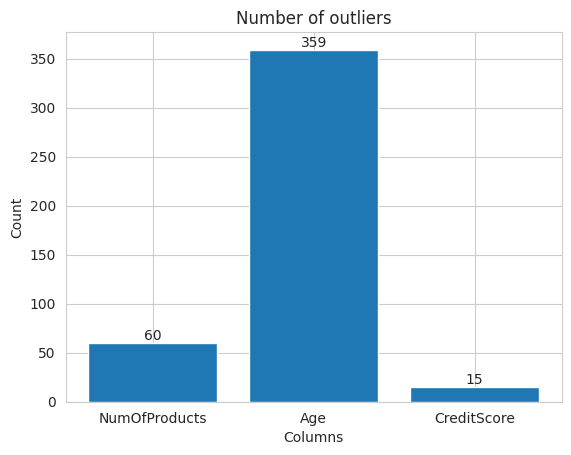

In [ ]:
outlier_counts = [60, 359, 15] # replace with your actual counts
columns = ['NumOfProducts', 'Age', 'CreditScore']

plt.bar(columns, outlier_counts)
plt.title("Number of outliers")
plt.xlabel("Columns")
plt.ylabel("Count")

# add annotations to the bars
for i, count in enumerate(outlier_counts):
    plt.annotate(str(count), xy=(i, count), ha='center', va='bottom')

plt.show()



### Handling outliers



*   <font color='Orange'>NumOfProducts has **60** outliers</font>
*   <font color='Orange'>Age coolumns contain **359** outliers</font>
*  <font color='Orange'> CreditScore **15** outliers</font>

There are different ways to handle outliers we can simply remove them, However, this may result in a significant loss of data, especially if there are many outliers like what we have in the **Age** columln.

For the Age column i decided that i will do the <font color = 'green'>Binning</font> technique, which involves grouping  the age values into discrete bins (e.g., 0-10, 10-20, etc.) so that the outliers are included in a separate bin. This can be useful  to keep the outlier information but reduce the impact of extreme values on the analysis.

Regarding the CreditScore and NumOfProducts column i have used the <font color = 'green'>Winsorization</font>, a  technique  that involves replacing the extreme values (i.e., outliers) with the nearest "normal" value.













In [ ]:
# Handling outlier for Age columns using Binning
# Create bins for age
bins = [0, 18, 25, 35, 45, 55, 65, np.inf]  # set the age ranges
labels = ['<18', '18-25', '26-35', '36-45', '46-55', '56-65', '65+'] # set the bin labels
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels) # create a new column 'AgeGroup' based on the bins

# Check the distribution of AgeGroup
data['AgeGroup'].value_counts()


36-45    3736
26-35    3542
46-55    1311
18-25     589
56-65     536
65+       264
<18        22
Name: AgeGroup, dtype: int64

In [ ]:
# Handling outlier for CreditScore and NumOfProducts column using winsorizing



# Winsorize the NumOfProducts column
data['NumOfProducts_wins'] = winsorize(data['NumOfProducts'], (0.05, 0.05))

# Winsorize the CreditScore column
data['CreditScore_wins'] = winsorize(data['CreditScore'], (0.05, 0.05))

# Check the new columns
print(data[['NumOfProducts', 'NumOfProducts_wins', 'CreditScore', 'CreditScore_wins']].head())



   NumOfProducts  NumOfProducts_wins  CreditScore  CreditScore_wins
0              1                   1          619               619
1              1                   1          608               608
2              3                   2          502               502
3              2                   2          699               699
4              1                   1          850               812


In [ ]:
data = data.drop(columns=['CreditScore', 'NumOfProducts'])

In [ ]:
data.head()

,Geography,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup,NumOfProducts_wins,CreditScore_wins
0,France,Female,42,2,0.00,1,1,101348.88,1,36-45,1,619
1,Spain,Female,41,1,83807.86,0,1,112542.58,0,36-45,1,608
2,France,Female,42,8,159660.80,1,0,113931.57,1,36-45,2,502
3,France,Female,39,1,0.00,0,0,93826.63,0,36-45,2,699
4,Spain,Female,43,2,125510.82,1,1,79084.10,0,36-45,1,812


### Checking for correlation

In [ ]:
# Compute correlation matrix
corr_matrix = data.corr()

corr_matrix

<ipython-input-147-d447657064c7>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,NumOfProducts_wins,CreditScore_wins
Age,1.000000,-0.009997,0.028308,-0.011721,0.085472,-0.007201,0.285323,-0.072852,-0.002400
Tenure,-0.009997,1.000000,-0.012254,0.022583,-0.028362,0.007784,-0.014001,0.013423,0.001050
Balance,0.028308,-0.012254,1.000000,-0.014858,-0.010084,0.012797,0.118533,-0.359646,0.006491
HasCrCard,-0.011721,0.022583,-0.014858,1.000000,-0.011866,-0.009933,-0.007138,0.003845,-0.003986
IsActiveMember,0.085472,-0.028362,-0.010084,-0.011866,1.000000,-0.011421,-0.156128,0.022321,0.024347
EstimatedSalary,-0.007201,0.007784,0.012797,-0.009933,-0.011421,1.000000,0.012097,0.010663,0.000520
Exited,0.285323,-0.014001,0.118533,-0.007138,-0.156128,0.012097,1.000000,-0.185447,-0.022502
NumOfProducts_wins,-0.072852,0.013423,-0.359646,0.003845,0.022321,0.010663,-0.185447,1.000000,0.014062
CreditScore_wins,-0.002400,0.001050,0.006491,-0.003986,0.024347,0.000520,-0.022502,0.014062,1.000000


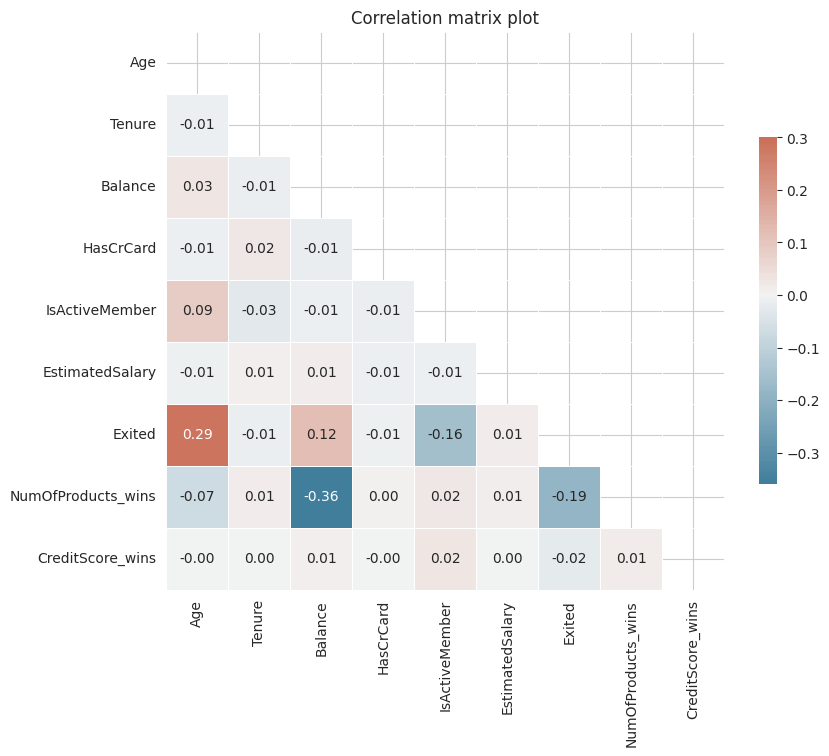

In [ ]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(9, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, annot=True, fmt=".2f", cbar_kws={"shrink": .5})

plt.title("Correlation matrix plot")
plt.show()


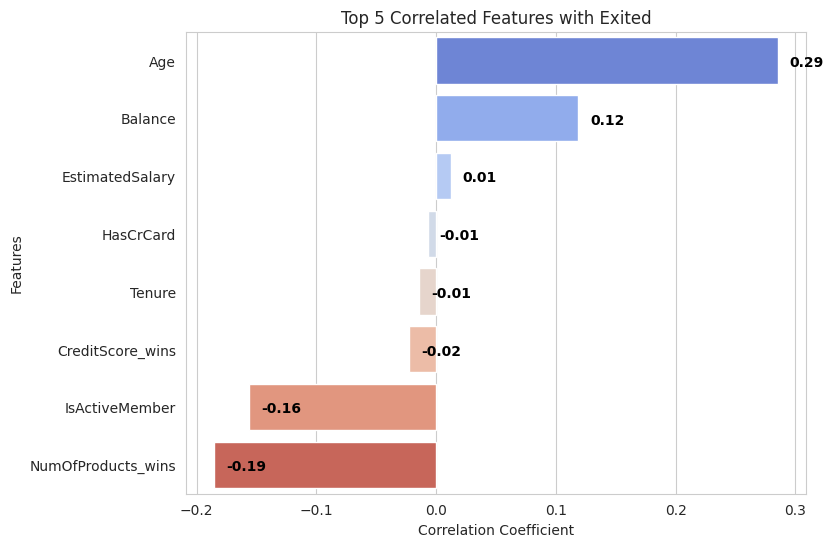

In [ ]:
# Get the top 5 features that are most correlated with Exited
top_features = corr_matrix['Exited'].sort_values(ascending=False)[1:11]

# Create a horizontal bar chart with annotations
plt.figure(figsize=(8,6))
ax = sns.barplot(x=top_features.values, y=top_features.index, palette='coolwarm')
plt.title('Top 5 Correlated Features with Exited')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
for i, v in enumerate(top_features.values):
    ax.text(v+0.01, i+0.1, str(round(v,2)), color='black', fontweight='bold')
plt.show()


In [ ]:
# Create a contingency table between Exited and Gender
contingency_table = pd.crosstab(data['Exited'], data['Gender'])

# Perform the chi-square test
stat, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square statistic: {stat}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected values:")
print(expected)


Chi-square statistic: 112.91857062096116
p-value: 2.2482100097131755e-26
Degrees of freedom: 1
Expected values:
[[3617.5909 4345.4091]
 [ 925.4091 1111.5909]]


The chi-square statistic of 112.91 with a p-value of 2.2482100097131755e-26 and degrees of freedom of 1 indicates a statistically significant association between the Exited and Gender variables. The expected values table shows the expected frequencies based on the null hypothesis of independence between the two variables. The observed frequencies deviate from the expected values, indicating a significant relationship between the two variables.

### Feature Selection 

After the correlation analysis i determined that i will use the columns Gender, AgeGrroup, balance, IsActiveMember , NumOfProducts_wins. 

In [ ]:
data.head()

,Geography,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup,NumOfProducts_wins,CreditScore_wins
0,France,Female,42,2,0.00,1,1,101348.88,1,36-45,1,619
1,Spain,Female,41,1,83807.86,0,1,112542.58,0,36-45,1,608
2,France,Female,42,8,159660.80,1,0,113931.57,1,36-45,2,502
3,France,Female,39,1,0.00,0,0,93826.63,0,36-45,2,699
4,Spain,Female,43,2,125510.82,1,1,79084.10,0,36-45,1,812


In [ ]:
X = data[['Gender', 'AgeGroup', 'Balance', 'IsActiveMember', 'NumOfProducts_wins']]
y = data[['Exited']].rename(columns={'Exited': 'Churn'})


### Data preprocessing

In [ ]:
X.dtypes

Gender                  object
AgeGroup              category
Balance                float64
IsActiveMember           int64
NumOfProducts_wins       int64
dtype: object

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Create an encoder for the Gender column
gender_encoder = OneHotEncoder(handle_unknown='ignore')
gender_encoder.fit(X_train[['Gender']])

X_train['AgeGroup'] = X_train['AgeGroup'].cat.codes
X_test['AgeGroup'] = X_test['AgeGroup'].cat.codes

# encode categorical features
cat_encoder = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = cat_encoder.fit_transform(X_train[['Gender']])
X_test_encoded = cat_encoder.transform(X_test[['Gender']])

# scale numerical features
num_scaler = StandardScaler()
X_train_scaled = num_scaler.fit_transform(X_train[['AgeGroup', 'Balance', 'IsActiveMember', 'NumOfProducts_wins']])
X_test_scaled = num_scaler.transform(X_test[['AgeGroup', 'Balance', 'IsActiveMember', 'NumOfProducts_wins']])


In [ ]:
# save the transformations
with open('cat_encoder.pkl', 'wb') as f:
    pickle.dump(cat_encoder, f)

with open('num_scaler.pkl', 'wb') as f:
    pickle.dump(num_scaler, f)


In [ ]:
# Initialize logistic regression model
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = logreg.predict(X_test_scaled)

# Print classification report to evaluate the model performance
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.97      0.90      1607
           1       0.62      0.19      0.29       393

    accuracy                           0.82      2000
   macro avg       0.72      0.58      0.59      2000
weighted avg       0.79      0.82      0.78      2000



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
with open('logreg.pkl', 'wb') as f:
    pickle.dump(logreg, f)

## Model Result 

This  classification report above shows the <font color='red'>**precision**</font>, <font color='red'>**recall**</font>, <font color='red'>**f1-score**</font>, and <font color='red'>**support**</font> for each class (**0** and **1**) and the overall <font color='red'>**accuracy**</font>, <font color='red'>**macro-average**</font>, and <font color='red'>**weighted-average**</font> of the model.

From the report, we can see that the model has an overall accuracy of **0.82**, which means it classifies **82%** of the data correctly. The <font color='blue'>**precision**</font> for class **0** is **0.83**, which means that when the model predicts that a customer will not churn, it is correct **83%**of the time. The <font color='blue'>**recall**</font> for class **0** is **0.97**, which means that the model correctly identifies <font color='orange'>**97%**</font> of the customers who will not churn.

On the other hand, the <font color='blue'>**precision**</font> for class **1** is **0.62**, which means that when the model predicts that a customer will churn, it is correct **62%** of the time. The <font color='blue'>**recall**</font> for class **1** is **0.19**, which means that the model only correctly identifies <font color='red'>**19%**</font> of the customers who will churn.

Overall, the model seems to be better at predicting customers who will not churn than customers who will churn. The f1-score is a harmonic mean of precision and recall, and for class 1, it is only 0.29, which is quite low.

## Summary

**Based on the evaluation metrics, the model has a high accuracy of 0.82 and a high precision for the negative class (customers who don't churn), but a relatively low precision for the positive class (customers who churn). This indicates that the model may have some difficulty in correctly identifying customers who are likely to churn. Therefore, it may be necessary to further improve the model by exploring other algorithms or adjusting the model parameters. Ultimately, the effectiveness of the model would depend on the specific needs and requirements of the bank.**